# AIPI 590 - XAI | Assignment #04
### Description
Explore 3 imodels: Greedy Tree Sums(FIGS), OneR Rule List, Skope Rule Set and provide visuals.
### Your Name
Xinyue(Yancey) Yang

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Talos6/AIPI590-Imodels/blob/main/AIPI590-Imodels.ipynb)

In [57]:
# Load packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Install imodels if not already installed
!pip install imodels==1.4.6

from imodels import FIGSClassifier, OneRClassifier, SkopeRulesClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Connect your GitHub repository to your Google Colab notebook

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "AIPI590-Imodels"
git_path = 'https://github.com/Talos6/AIPI590-Imodels.git'
!git clone "{git_path}"

# Change working directory to location of notebook
%cd "{repo_name}"
%ls

Cloning into 'AIPI590-Imodels'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 1), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 4.97 KiB | 4.97 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/AIPI590-Imodels
data.csv  README.md


## Data
I am using Heart Arrack Analysis & Prediction Dataset From Kaggle.

Link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
Author: https://www.kaggle.com/rashikrahmanpritom

This dataset contains 13 numerical or categorical measurements and a final binary output.

## Column Details
*   age: age of the person
*   sex: gender of the person
*   cp: Chest Pain type
*   trtbps: resting blood pressure (in mm Hg)
*   chol: cholestoral in mg/dl fetched via BMI sensor
*   fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   restecg : resting electrocardiographic results
*   thalachh : maximum heart rate achieved
*   exng: exercise induced angina (1 = yes; 0 = no)
*   oldpeak: Previous peak
*   slp: Slope
*   caa: number of major vessels (0-4)
*   thall: Thal rate
*   output: Target variable (0= less chance of heart attack 1= more chance of heart attack)

In [18]:
# Load data
df = pd.read_csv('data.csv')

# Split into X and y
X = df.drop('output', axis=1)
y = df['output']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Greedy Tree Sums (FIGS)
Greedy Tree Sums (FIGS) is a method that grows multiple decision trees in a greedy manner, summing the predictions from each tree to generate the final prediction.

### Flow diagram
Input -> Grow multiple small decision trees -> Sum predictions -> Output

### Performance
Our model only introduce three simple sub-trees and each with only one split. We can tell the three key features are cp, caa and thall. It reached 90% accuracy.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FIGS Accuracy: 0.9016393442622951


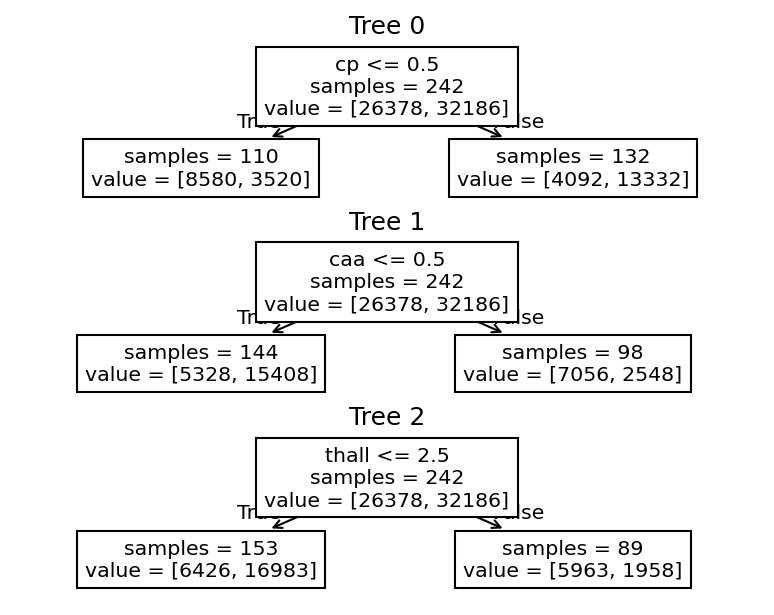

In [38]:
# Initialize FIGS model
figs = FIGSClassifier(max_rules=3)

# Train FIGS model
figs.fit(X_train, y_train)

# Predict on test set
y_pred = figs.predict(X_test)

# Evaluate accuracy
print("FIGS Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the model
figs.plot()

## OneR Rule List
OneR Rule List is a simple rule-based algorithm that generates the decision rule based on only one feature at a time.

### Flow diagram
Input -> Building a greedy rule using only one feature -> form rule list with the highest accuracy -> Output

### Performance
Since OneR classifer only using the most important feature and creates a rule list, it reached 72% accuracy but it is the simplest, easy to understand and can generate prediction only rely on limited data.

In [58]:
# Initialize OneR model
oner = OneRClassifier()

# Train OneR model
oner.fit(X_train, y_train)

# Predict on test set
y_pred = oner.predict(X_test)

# Evaluate accuracy
print("OneR Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the model
print("OneR learned rule:")
for rule in oner.rules_:
    print(rule)

OneR Accuracy: 0.7213114754098361
OneR learned rule:
{'col': 'caa', 'index_col': 11, 'cutoff': 0.5, 'val': 0.2653061224489796, 'flip': True, 'val_right': 0.7430555555555556, 'num_pts': 242, 'num_pts_right': 144}
{'col': 'caa', 'index_col': 11, 'cutoff': 3.5, 'val': 0.24210526315789474, 'flip': False, 'val_right': 1.0, 'num_pts': 98, 'num_pts_right': 3}
{'col': 'caa', 'index_col': 11, 'cutoff': 1.5, 'val': 0.19047619047619047, 'flip': True, 'val_right': 0.2830188679245283, 'num_pts': 95, 'num_pts_right': 53}
{'col': 'caa', 'index_col': 11, 'cutoff': 2.5, 'val': 0.1875, 'flip': True, 'val_right': 0.19230769230769232, 'num_pts': 42, 'num_pts_right': 26}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Skope Rule Set
SkopeRules is a rule-based ensemble method, generating rules from a decision tree ensemble and pruning them for better generalization.

### Flow diagram
Input → Train tree ensemble → Extract rules → Deduplicate rules → Combine rules -> output

### Performance
Skope Rules Set are abstract, dedupe and combine rules to favourite the balance of precision and recall. It didn't perform well for accuracy score as only 47% on our test set. But it shows a easier understand interpretation comparing to the trees ensemble and towards balance of precision, recall.

In [71]:
# Initialize Skope Rules model
skope = SkopeRulesClassifier()

# Train Skope Rules model
skope.fit(X_train, y_train)

# Predict on test set
y_pred = skope.predict(X_test)

# Evaluate accuracy
print("Skop Rules Set Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the model
for _, (rule, metrics) in enumerate(skope.rules_):
    print(f"{rule} with metrics {metrics}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Skop Rules Set Accuracy: 0.47540983606557374
caa <= 0.5 and oldpeak <= 1.95 and thall <= 2.5 with metrics (0.8846153846153846, 0.7931034482758621, 1)
caa <= 0.5 and oldpeak <= 2.55 and thall <= 2.5 with metrics (0.8695652173913043, 0.7692307692307693, 1)
exng <= 0.5 and oldpeak <= 1.7 and thall <= 2.5 with metrics (0.8200000000000001, 0.6954022988505747, 2)
caa <= 0.5 and exng <= 0.5 and thall <= 2.5 with metrics (0.9375, 0.6, 1)
caa <= 0.5 and cp > 0.5 and oldpeak <= 2.4 with metrics (0.8571428571428571, 0.6206896551724138, 1)
caa <= 0.5 and oldpeak <= 1.7 and thall <= 2.5 with metrics (0.8909430438842204, 0.5768181818181818, 3)
caa <= 0.5 and cp > 0.5 and thall <= 2.5 with metrics (0.7333333333333333, 0.4782608695652174, 1)
caa > 0.5 and cp > 0.5 and slp > 1.5 with metrics (0.8333333333333334, 0.22727272727272727, 1)
caa <= 0.5 and cp <= 0.5 and exng <= 0.5 with metrics (0.7222222222222222, 0.22113943028485758, 2)
caa > 0.5 and sex <= 0.5 and thall <= 2.5 with metrics (0.6, 0.125, 1)